In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)

C:\Users\mkhal\AppData\Local\Temp\ipykernel_25992\1997496975.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(), inplace=True)


In [8]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
data.shape

(5110, 12)

## Data Analysis and Visualization

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

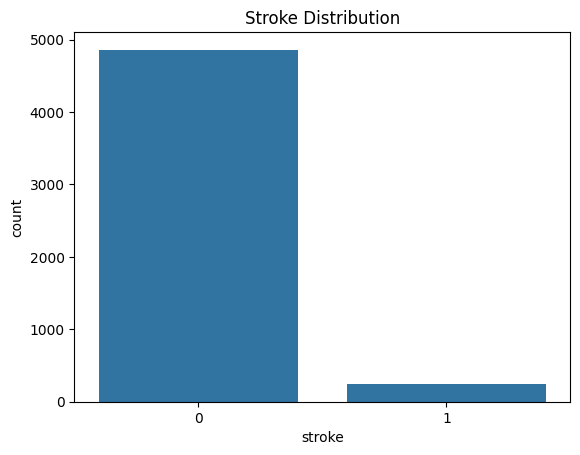

In [15]:
sns.countplot(x='stroke', data=data)
plt.title('Stroke Distribution')
plt.show()

C:\Users\mkhal\AppData\Local\Temp\ipykernel_25992\1339587897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='gender', palette='Set2')


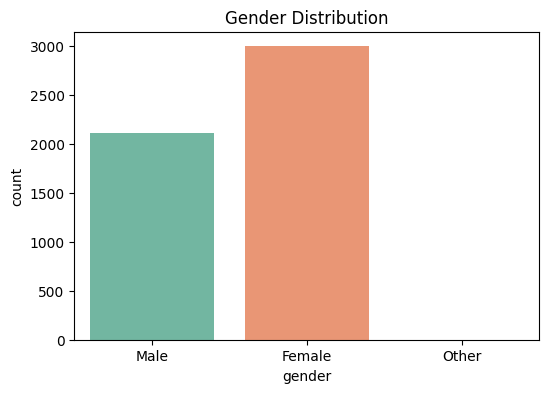

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='gender', palette='Set2')
plt.title("Gender Distribution")
plt.show()

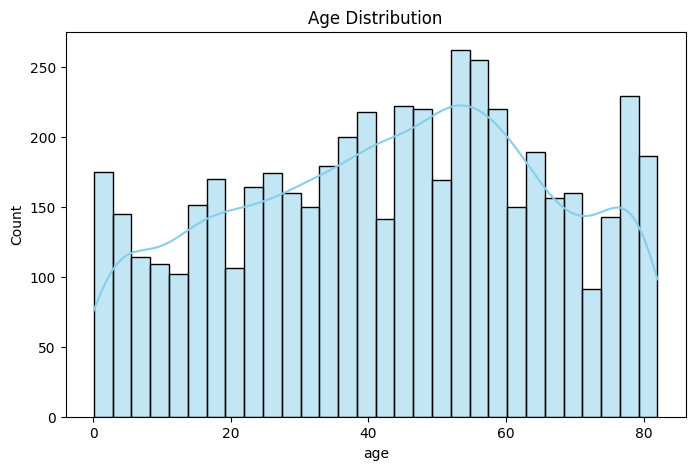

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(data['age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.show()

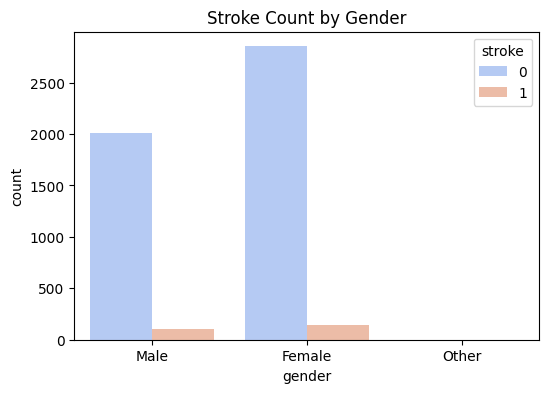

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='gender', hue='stroke', palette='coolwarm')
plt.title("Stroke Count by Gender")
plt.show()

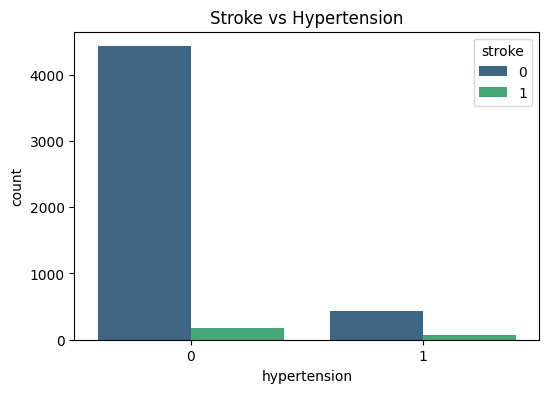

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='hypertension', hue='stroke', palette='viridis')
plt.title("Stroke vs Hypertension")
plt.show()

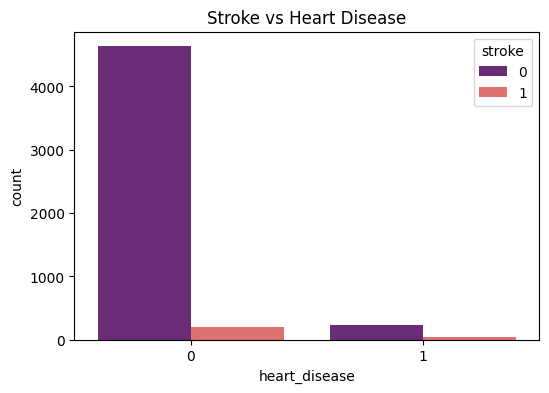

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='heart_disease', hue='stroke', palette='magma')
plt.title("Stroke vs Heart Disease")
plt.show()

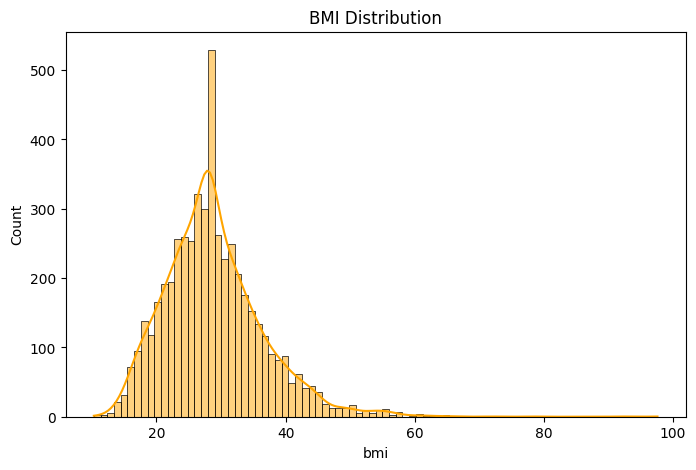

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(data['bmi'].dropna(), kde=True, color='orange')
plt.title("BMI Distribution")
plt.show()

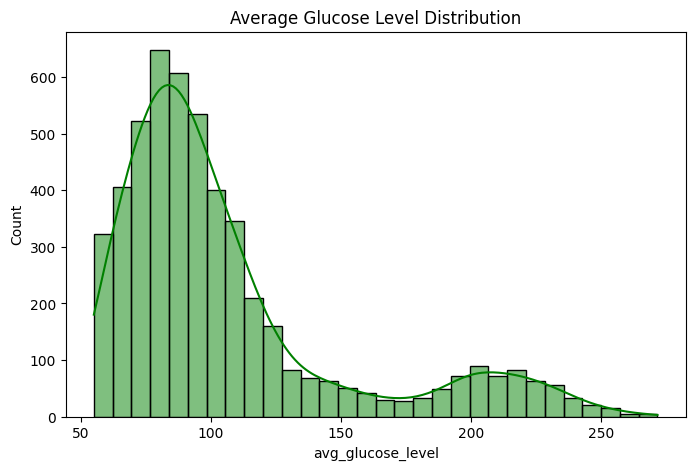

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(data['avg_glucose_level'], bins=30, kde=True, color='green')
plt.title("Average Glucose Level Distribution")
plt.show()

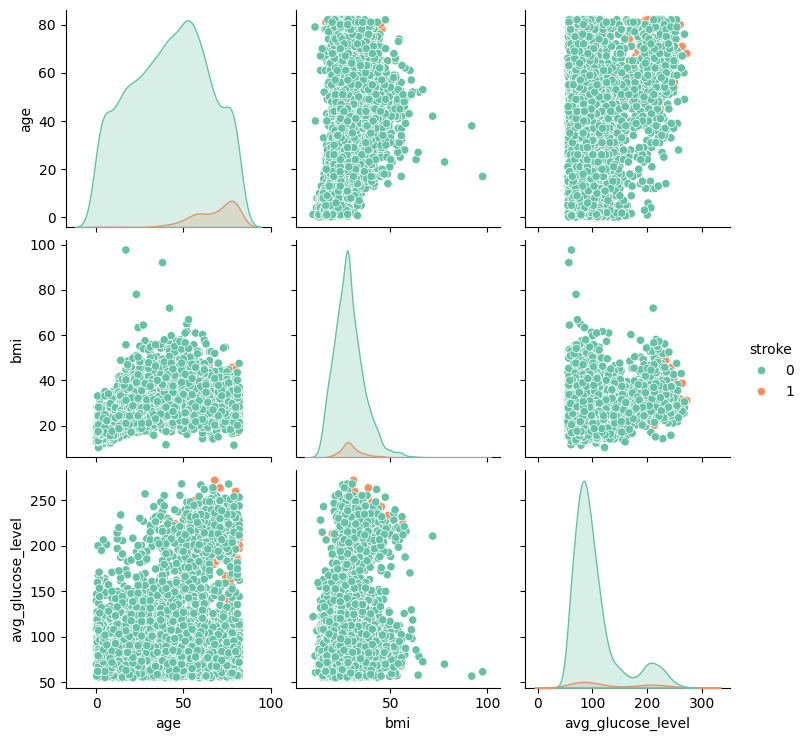

In [24]:
sns.pairplot(data, hue='stroke', vars=['age','bmi','avg_glucose_level'], palette='Set2')
plt.show();

## Data Encoding

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [31]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])  
data['ever_married'] = le.fit_transform(data['ever_married'])

data = pd.get_dummies(data, columns=['work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [32]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,228.69,36.6,1,False,True,False,False,True,True,False,False
1,51676,0,61.0,0,0,1,202.21,28.1,1,False,False,True,False,False,False,True,False
2,31112,1,80.0,0,1,1,105.92,32.5,1,False,True,False,False,False,False,True,False
3,60182,0,49.0,0,0,1,171.23,34.4,1,False,True,False,False,True,False,False,True
4,1665,0,79.0,1,0,1,174.12,24.0,1,False,False,True,False,False,False,True,False


In [33]:
data.drop('id', axis=1, inplace=True)

X = data.drop('stroke', axis=1)
y = data['stroke']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
X_train.shape

(4088, 15)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train_scaled, y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
rf_model.predict_proba(X_test_scaled)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.96666667, 0.03333333],
       [1.        , 0.        ],
       [0.99333333, 0.00666667]], shape=(1022, 2))

In [40]:
y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9481409001956947


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



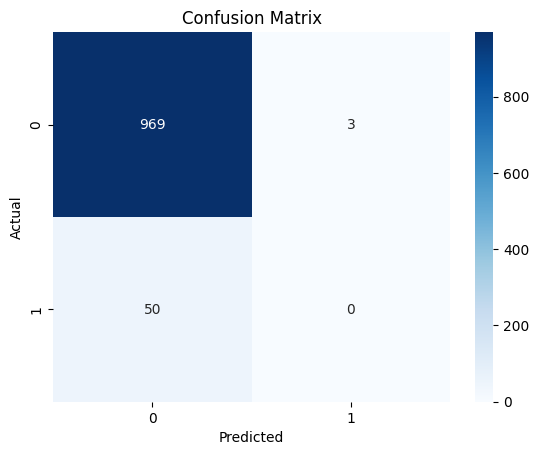

In [42]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()